# Plot 1-dimensional output plots
This notebook plots each parameter against the outputs that we are interested in.  
First, all together to asses the correlation between parameters and outputs.  
Then, we plot the two key factors against transition time and split by mean RWP.

## Imports, fonts, functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as colors
import scipy.stats

In [2]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title


In [3]:
def load_output(design_name, output_name):
    return np.loadtxt(f"/home/users/eers/sct/old_repo/output_data/sct_{design_name}_{output_name}.csv", delimiter=',')

def plot_output(inputs, output, ax_row, c, marker=None, ylabel=None, cmap=None, norm=None):
    if marker is not None:
        marker=marker
    else:
        marker='o'
    
    for i in range(6):
        ax_row[i].scatter(inputs[:,i], output, c=c, s=80, marker=marker, cmap=cmap, norm=norm)
        x_data = inputs[:,i]
        y_data = output
        
        r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
        m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
        x_data_sorted = np.sort(x_data)
            
        y_pred = [(m*x+b) for x in x_data_sorted]

        corr = scipy.stats.pearsonr(x_data, y_data)  
        ax_row[i].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {corr.correlation:.2f}, p: {corr.pvalue:.3f}')
        ax_row[i].text(0, -0.25, f'r: {corr.correlation:.2f}', transform= ax_row[i].transAxes)
        ax_row[i].text(0, -0.35, f'p: {corr.pvalue:.3f}', transform= ax_row[i].transAxes)
    
    ax_row[0].set_ylabel(ylabel)
    
def add_titles(axes):
    titles = ['$BL~q_{v}$', '$Inv$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$N_{a}$', '$b_{aut}$', 'vs transition time']
    for ax, title in zip(axes[0], titles):
        ax.set_title(title)
        
def calc_mean_std(dataset):
    mean = np.sum(dataset)/len(dataset)
    std = (np.sum([(i - mean)**2 for i in dataset])/(len(dataset)-1))**0.5
    std_val = [(i - mean)/std for i in dataset]
    return mean, std, std_val

def calc_r(x_data, y_data):
    '''
    Calculates the correlation coefficient r, which is essentially the mean of the standardised residuals
    '''
    x_mean, x_std, x_std_val = calc_mean_std(x_data)
    y_mean, y_std, y_std_val = calc_mean_std(y_data)
    
    product = [z_x*z_y for z_x, z_y in zip(x_std_val, y_std_val)]
    
    return np.sum(product)/(len(x_data) - 1), y_mean, x_mean, y_std, x_std

def calc_line(r, y_mean, x_mean, y_std, x_std):
    m = r*(y_std/x_std)
    b = y_mean - m*x_mean
    return m, b

<>:29: SyntaxWarning: invalid escape sequence '\D'
<>:29: SyntaxWarning: invalid escape sequence '\D'
/tmp/ipykernel_565/2293369477.py:29: SyntaxWarning: invalid escape sequence '\D'
  titles = ['$BL~q_{v}$', '$Inv$', r'$\Delta~\theta$', '$\Delta~q_{v}$', '$N_{a}$', '$b_{aut}$', 'vs transition time']


## Plot all parameters against outputs of interest

### Post spinup

In [74]:
output_data = {}
output_data["RWP mean"] = np.loadtxt("data/output_data/rwp_mean_output.csv", delimiter=',', skiprows=1)
output_data["Transition time"] = np.loadtxt("data/output_data/transition_time_output.csv", delimiter=',', skiprows=1)

inputs = np.loadtxt("data/input_data/post_spinup_inputs.csv", delimiter=',', skiprows=1)
inputs[:,5] = [10**x for x in inputs[:,5]]

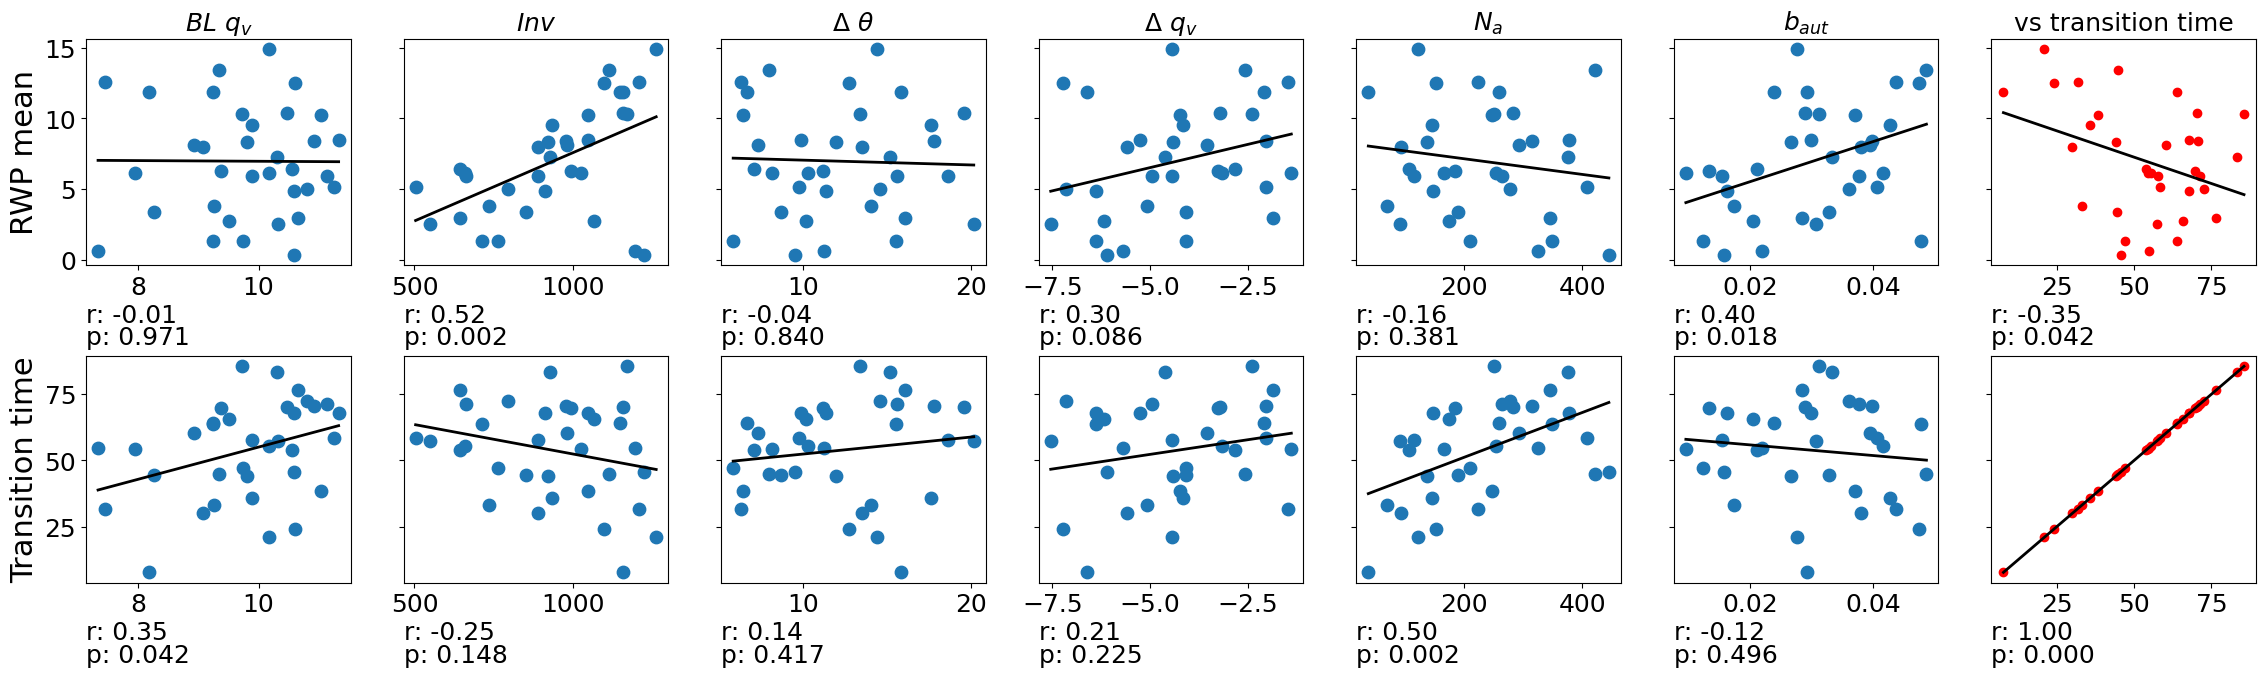

In [75]:
### Big grid of possible indicators

r = len(output_data.keys())
c = 7
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(4*c,4*r), sharey='row')
plt.subplots_adjust(hspace=0.4, bottom=0.2)

for ax_row, (name, output) in zip(axes, output_data.items()):      
    plot_output(inputs, output, ax_row, "C0", ylabel=name)
    
    ax_row[-1].scatter(output_data["Transition time"], output, c='red')
    x_data = output_data["Transition time"]
    y_data = output
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]

    corr = scipy.stats.pearsonr(x_data, y_data)  
    ax_row[-1].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {corr.correlation:.2f}, p: {corr.pvalue:.2f}')
    ax_row[-1].text(0, -0.25, f'r: {corr.correlation:.2f}', transform= ax_row[-1].transAxes)
    ax_row[-1].text(0, -0.35, f'p: {corr.pvalue:.3f}', transform= ax_row[-1].transAxes)

add_titles(axes)

### Sc beginning time

In [76]:
output_data = {}
output_data["RWP mean"] = np.loadtxt("data/output_data/rwp_mean_output.csv", delimiter=',', skiprows=1)
output_data["Transition time"] = np.loadtxt("data/output_data/transition_time_output.csv", delimiter=',', skiprows=1)

inputs = np.loadtxt("data/input_data/sc_beginning_inputs.csv", delimiter=',', skiprows=1)
inputs[:,5] = [10**x for x in inputs[:,5]]

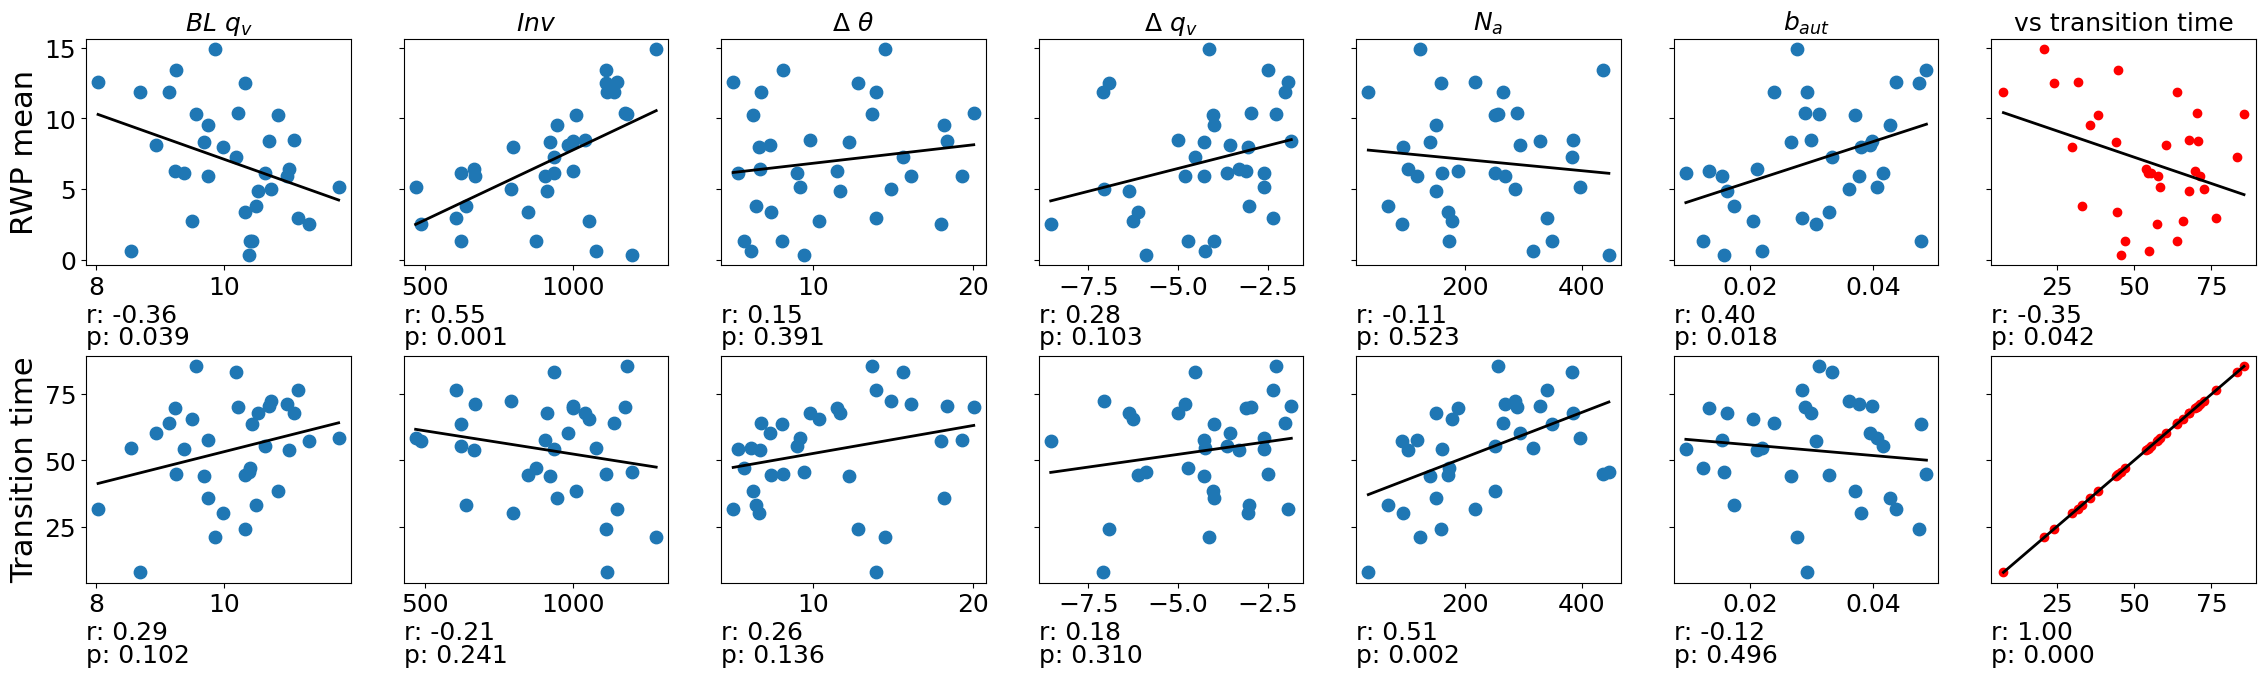

In [77]:
### Big grid of possible indicators

r = len(output_data.keys())
c = 7
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(4*c,4*r), sharey='row')
plt.subplots_adjust(hspace=0.4, bottom=0.2)

for ax_row, (name, output) in zip(axes, output_data.items()):      
    plot_output(inputs, output, ax_row, "C0", ylabel=name)
    
    ax_row[-1].scatter(output_data["Transition time"], output, c='red')
    x_data = output_data["Transition time"]
    y_data = output
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]

    corr = scipy.stats.pearsonr(x_data, y_data)  
    ax_row[-1].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {corr.correlation:.2f}, p: {corr.pvalue:.2f}')
    ax_row[-1].text(0, -0.25, f'r: {corr.correlation:.2f}', transform= ax_row[-1].transAxes)
    ax_row[-1].text(0, -0.35, f'p: {corr.pvalue:.3f}', transform= ax_row[-1].transAxes)

add_titles(axes)

### Sc beginning time - ICE mean

In [4]:
output_data = {}
output_data["RWP mean"] = np.loadtxt("data/output_data/rwp_mean_output_ice_mean.csv", delimiter=',', skiprows=1)
output_data["Transition time"] = np.loadtxt("data/output_data/transition_time_output_ice_mean.csv", delimiter=',', skiprows=1)

inputs = np.loadtxt("data/input_data/sc_beginning_inputs.csv", delimiter=',', skiprows=1)
inputs[:,5] = [10**x for x in inputs[:,5]]

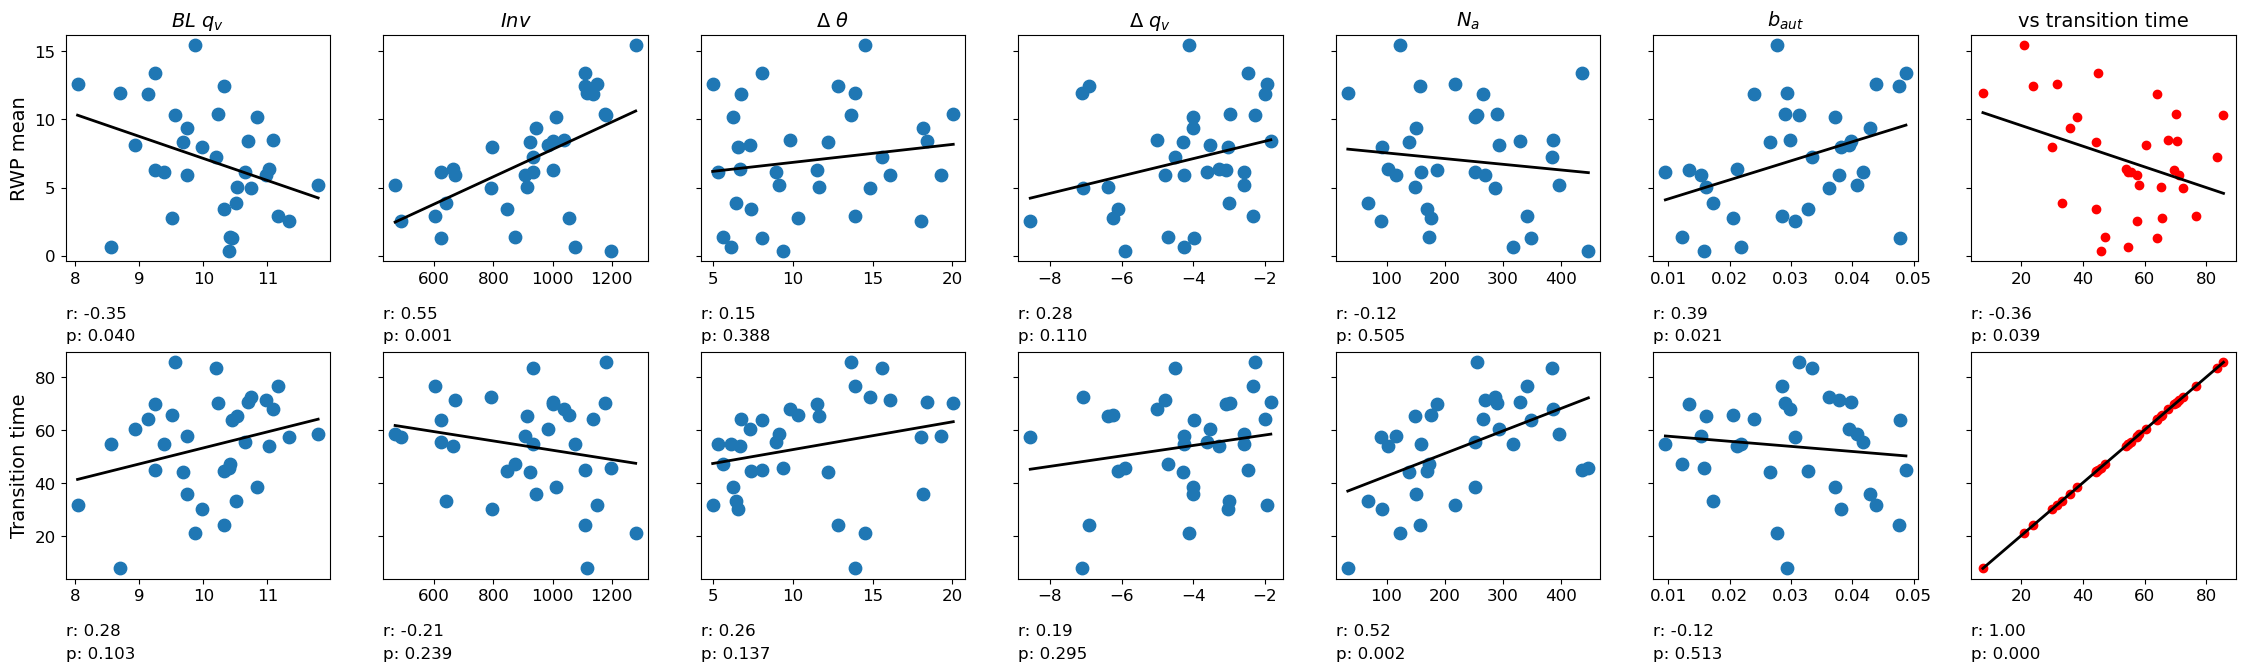

In [5]:
### Big grid of possible indicators

r = len(output_data.keys())
c = 7
fig, axes = plt.subplots(nrows=r, ncols=c, figsize=(4*c,4*r), sharey='row')
plt.subplots_adjust(hspace=0.4, bottom=0.2)

for ax_row, (name, output) in zip(axes, output_data.items()):      
    plot_output(inputs, output, ax_row, "C0", ylabel=name)
    
    ax_row[-1].scatter(output_data["Transition time"], output, c='red')
    x_data = output_data["Transition time"]
    y_data = output
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]

    corr = scipy.stats.pearsonr(x_data, y_data)  
    ax_row[-1].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {corr.correlation:.2f}, p: {corr.pvalue:.2f}')
    ax_row[-1].text(0, -0.25, f'r: {corr.correlation:.2f}', transform= ax_row[-1].transAxes)
    ax_row[-1].text(0, -0.35, f'p: {corr.pvalue:.3f}', transform= ax_row[-1].transAxes)

add_titles(axes)

## Plot key factors against transition time and split by mean RWP 

### Post spinup

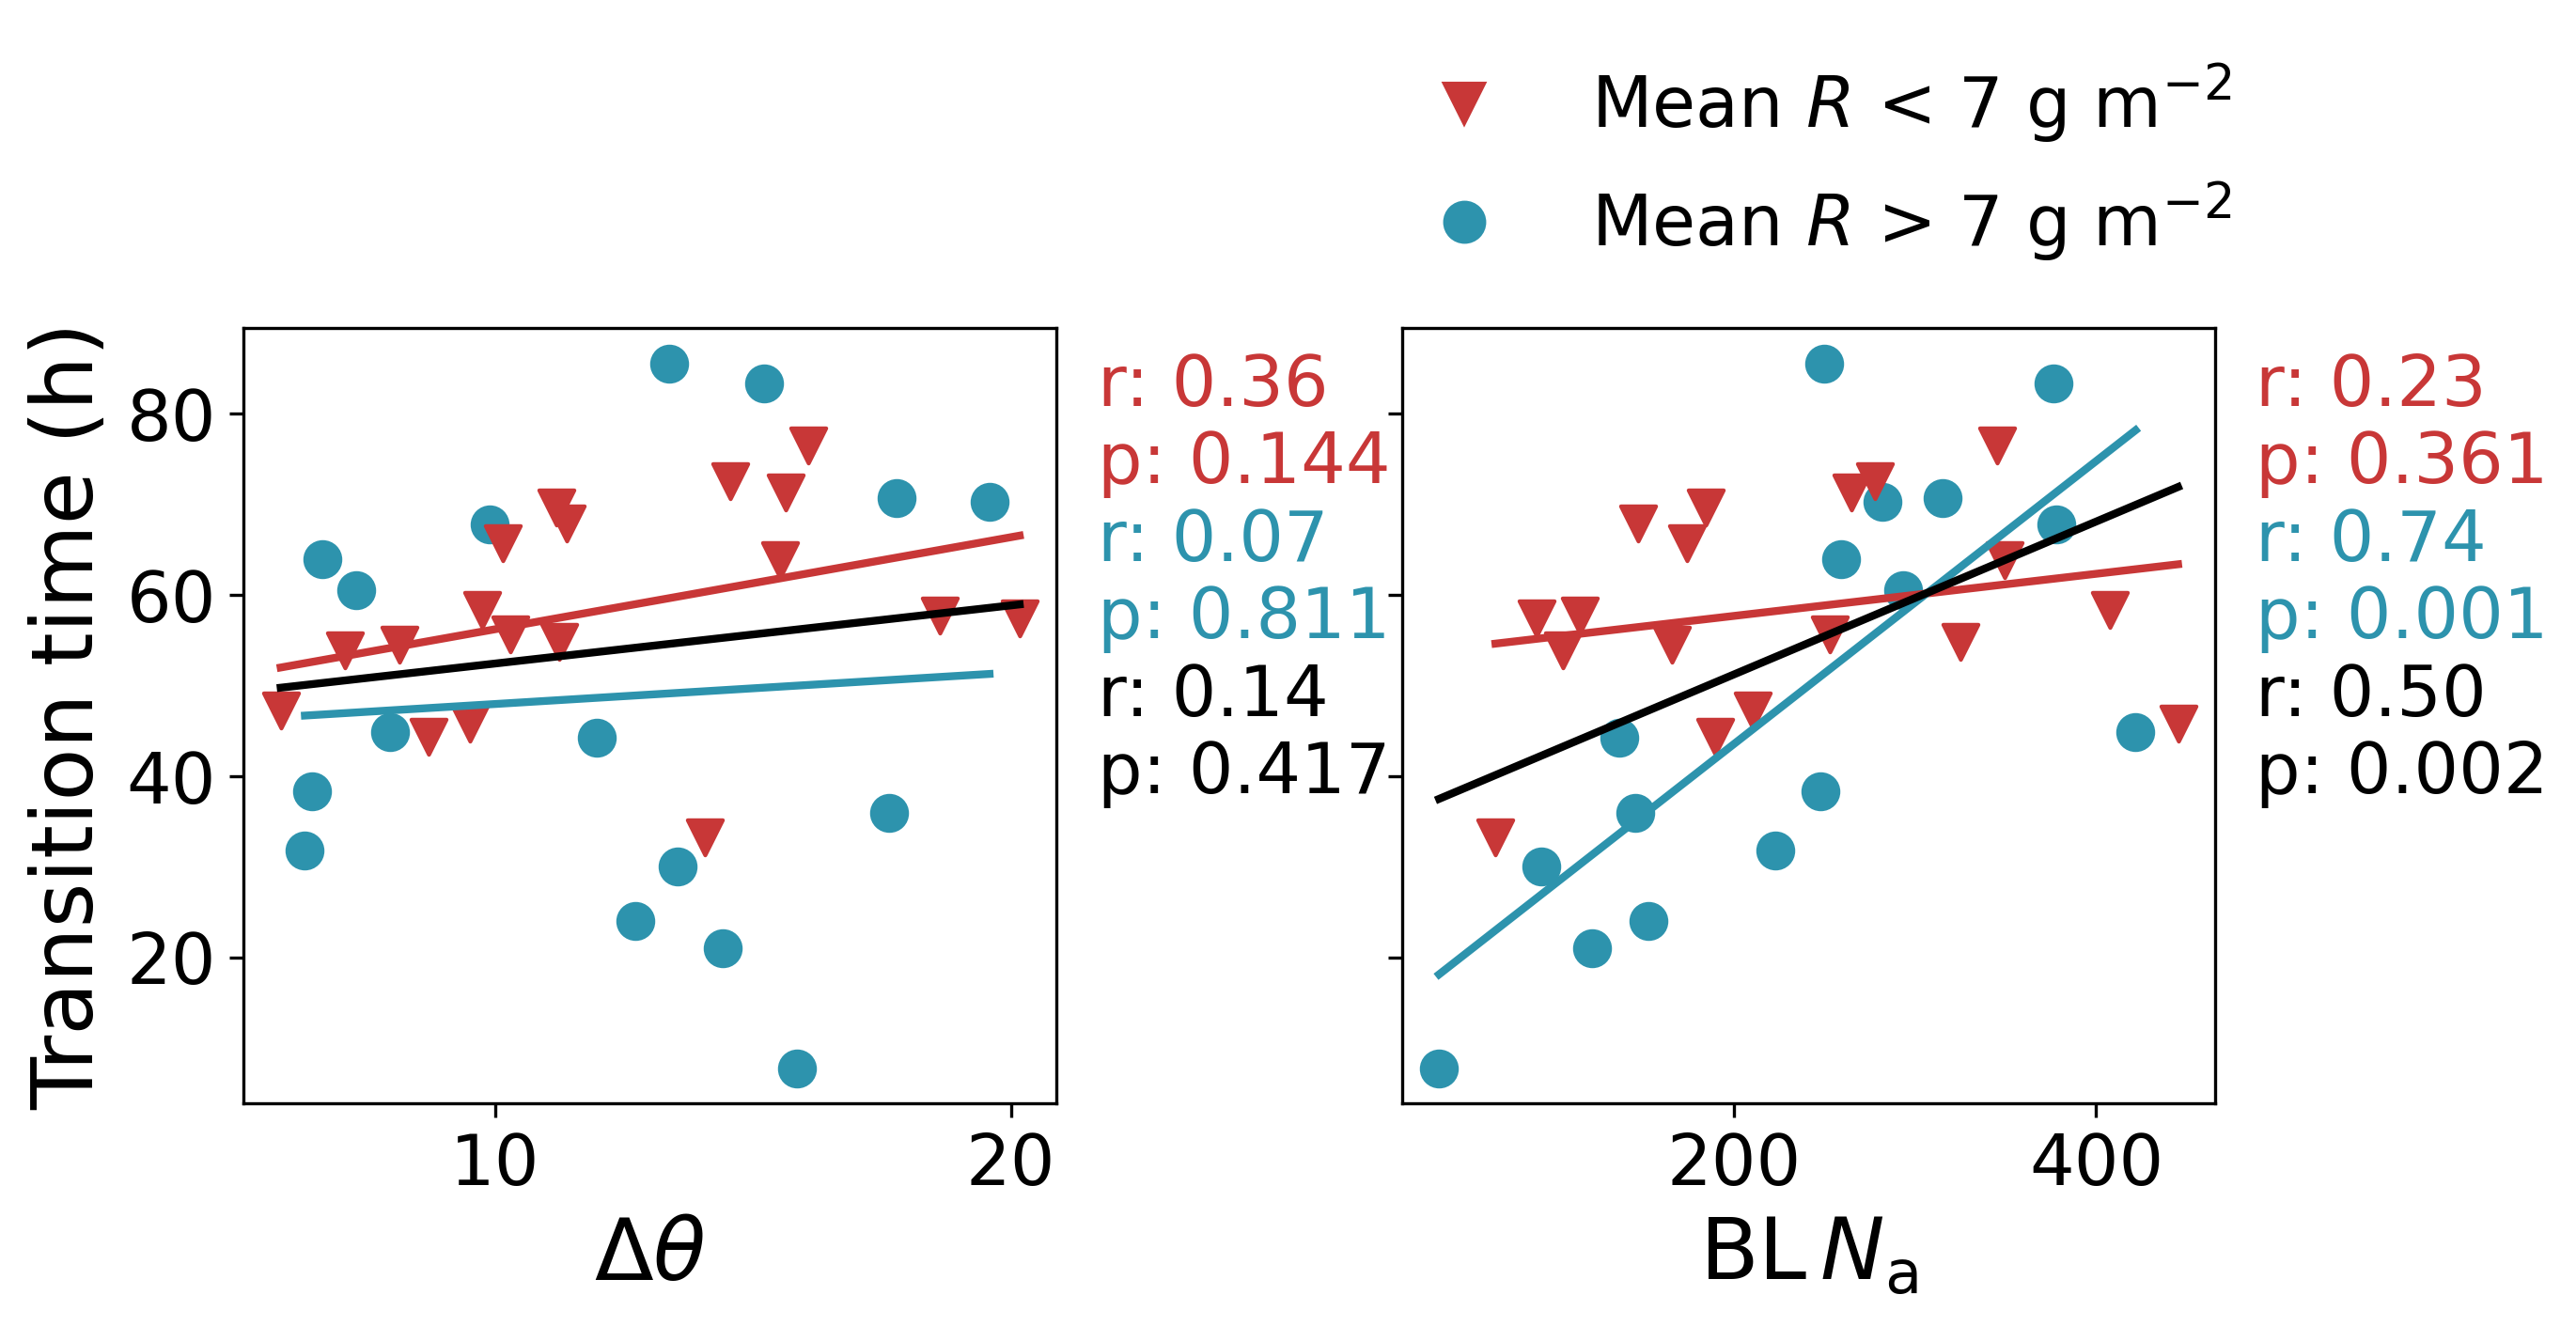

In [56]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

blue_colour = "#2d93adff"
red_colour = "#c83737ff"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.2,5), sharey='row', dpi=300)    # just delta theta and na
#fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5), sharey='row', dpi=300)    # just delta theta and na
plt.subplots_adjust(top=0.75, bottom=0.2, wspace=0.425, left=0.1, right=0.86)

#titles = ['BL q$_{v}$', 'BL z', r'$\Delta$$\theta$', '$\Delta$q$_{v}$', 'BL N$_{a}$', '10$^{b_{aut}}$', 'vs transition time']
titles = [r'$\Delta\theta$','$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$']
for l, (title, i) in enumerate(zip(titles, [2,4])):
    axes[l].set_xlabel(title)

    axes[l].scatter(inputs[:,i][output_data["RWP mean"] > 7], output_data["Transition time"][output_data["RWP mean"] > 7], c=blue_colour, s=80, marker='o')
    axes[l].scatter(inputs[:,i][output_data["RWP mean"] < 7], output_data["Transition time"][output_data["RWP mean"] < 7], c=red_colour, s=80, marker='v')
    
    x_data = inputs[:,i][output_data["RWP mean"] < 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] < 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=red_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.9, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=red_colour)
    axes[l].text(1.05, 0.8, f'p: {pearson.pvalue:.3f}', transform= axes[l].transAxes, color=red_colour)

    x_data = inputs[:,i][output_data["RWP mean"] > 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] > 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=blue_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.7, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=blue_colour)
    axes[l].text(1.05, 0.6, f'p: {pearson.pvalue:.3f}', transform= axes[l].transAxes, color=blue_colour)

    x_data = inputs[:,i]
    y_data = output_data["Transition time"]
    
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)

    axes[l].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.5,f'r: {pearson.correlation:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67
    axes[l].text(1.05, 0.4,f'p: {pearson.pvalue:.3f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67


axes[0].set_ylabel("Transition time (h)")

blues = mlines.Line2D([], [], color=blue_colour, marker='o', linestyle='None',
                          markersize=10)
reds = mlines.Line2D([], [], color=red_colour, marker='v', linestyle='None',
                          markersize=10)
fig.legend(handles=[reds, blues], 
             labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mathit{R}$ > 7 g m$^{-2}$"], 
             loc=(0.53,0.78), frameon=False)

fig.savefig("figures/output_1d_rwp_split_pval.png", facecolor='white', dpi=300)
fig.savefig("figures/output_1d_rwp_split_pval.pdf", facecolor='white', dpi=300)

### Sc beginning 

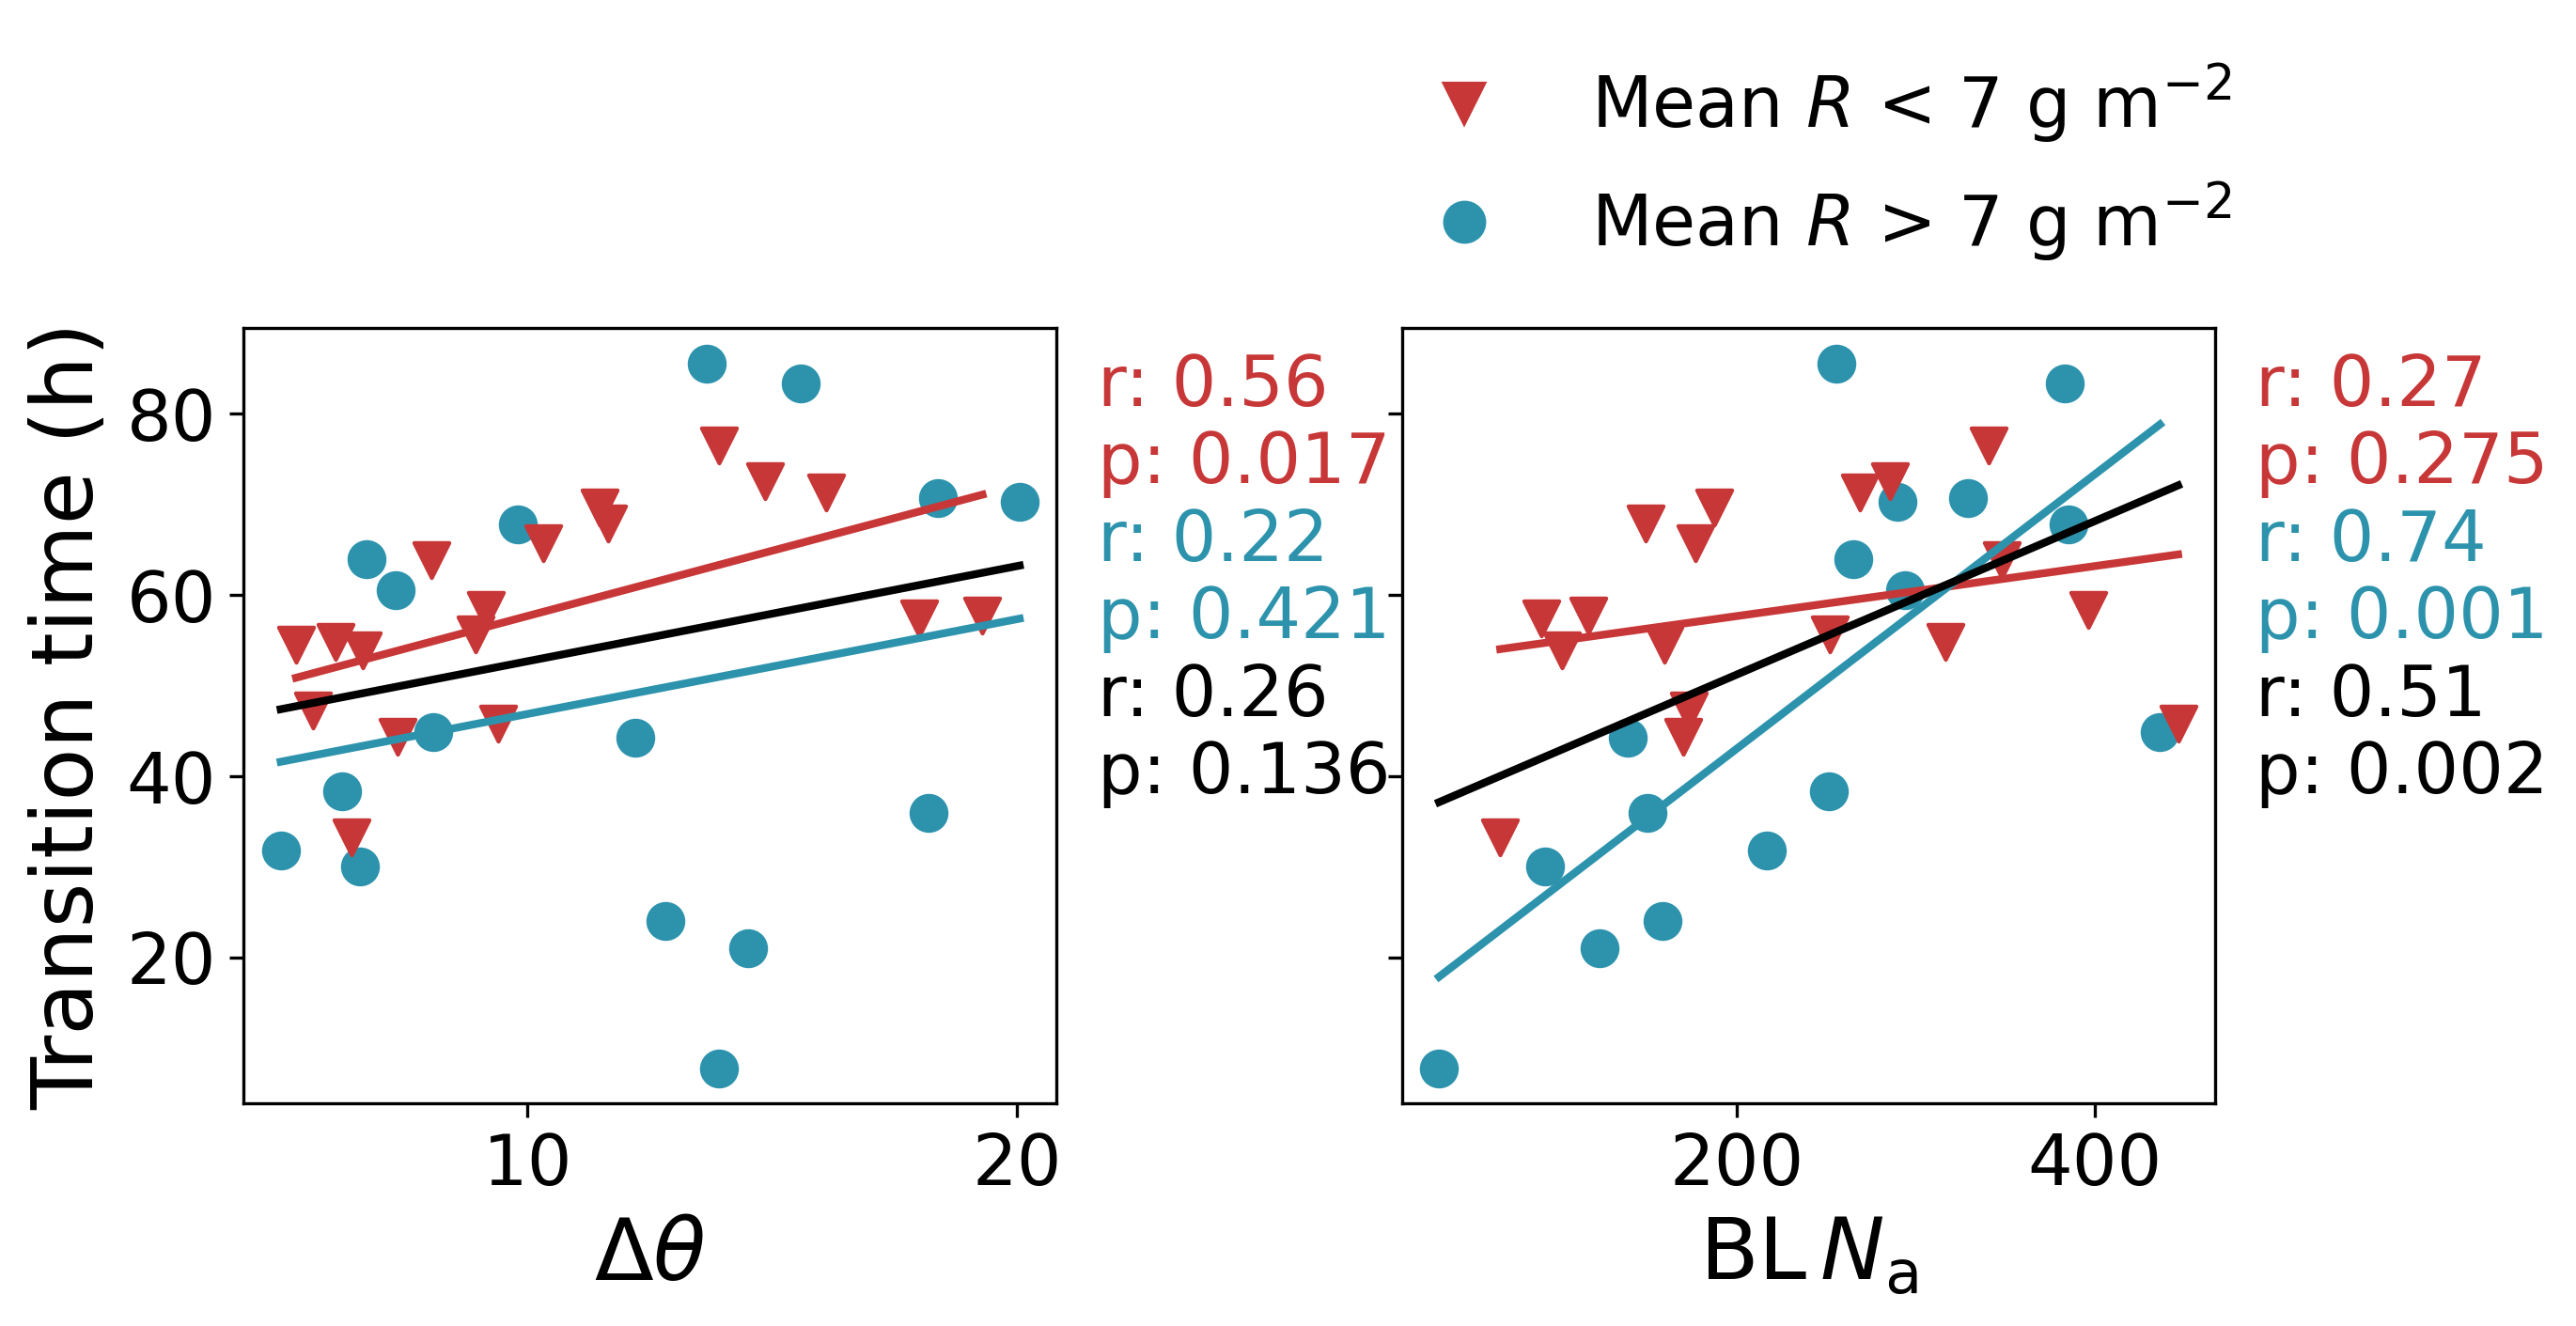

In [53]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

blue_colour = "#2d93adff"
red_colour = "#c83737ff"

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(9.2,5), sharey='row', dpi=300)    # just delta theta and na
#fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5), sharey='row', dpi=300)    # just delta theta and na
plt.subplots_adjust(top=0.75, bottom=0.2, wspace=0.425, left=0.1, right=0.86)

#titles = ['BL q$_{v}$', 'BL z', r'$\Delta$$\theta$', '$\Delta$q$_{v}$', 'BL N$_{a}$', '10$^{b_{aut}}$', 'vs transition time']
titles = [r'$\Delta\theta$','$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$']
for l, (title, i) in enumerate(zip(titles, [2,4])):
    axes[l].set_xlabel(title)

    axes[l].scatter(inputs[:,i][output_data["RWP mean"] > 7], output_data["Transition time"][output_data["RWP mean"] > 7], c=blue_colour, s=80, marker='o')
    axes[l].scatter(inputs[:,i][output_data["RWP mean"] < 7], output_data["Transition time"][output_data["RWP mean"] < 7], c=red_colour, s=80, marker='v')
    
    x_data = inputs[:,i][output_data["RWP mean"] < 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] < 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=red_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.9, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=red_colour)
    axes[l].text(1.05, 0.8, f'p: {pearson.pvalue:.3f}', transform= axes[l].transAxes, color=red_colour)

    x_data = inputs[:,i][output_data["RWP mean"] > 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] > 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=blue_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.7, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=blue_colour)
    axes[l].text(1.05, 0.6, f'p: {pearson.pvalue:.3f}', transform= axes[l].transAxes, color=blue_colour)

    x_data = inputs[:,i]
    y_data = output_data["Transition time"]
    
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)

    axes[l].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.5,f'r: {pearson.correlation:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67
    axes[l].text(1.05, 0.4,f'p: {pearson.pvalue:.3f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67


axes[0].set_ylabel("Transition time (h)")

blues = mlines.Line2D([], [], color=blue_colour, marker='o', linestyle='None',
                          markersize=10)
reds = mlines.Line2D([], [], color=red_colour, marker='v', linestyle='None',
                          markersize=10)
fig.legend(handles=[reds, blues], 
             labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mathit{R}$ > 7 g m$^{-2}$"], 
             loc=(0.53,0.78), frameon=False)

fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval.png", facecolor='white', dpi=300)
fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval.pdf", facecolor='white', dpi=300)

## Figure 10 edit to include mean R vs transition time

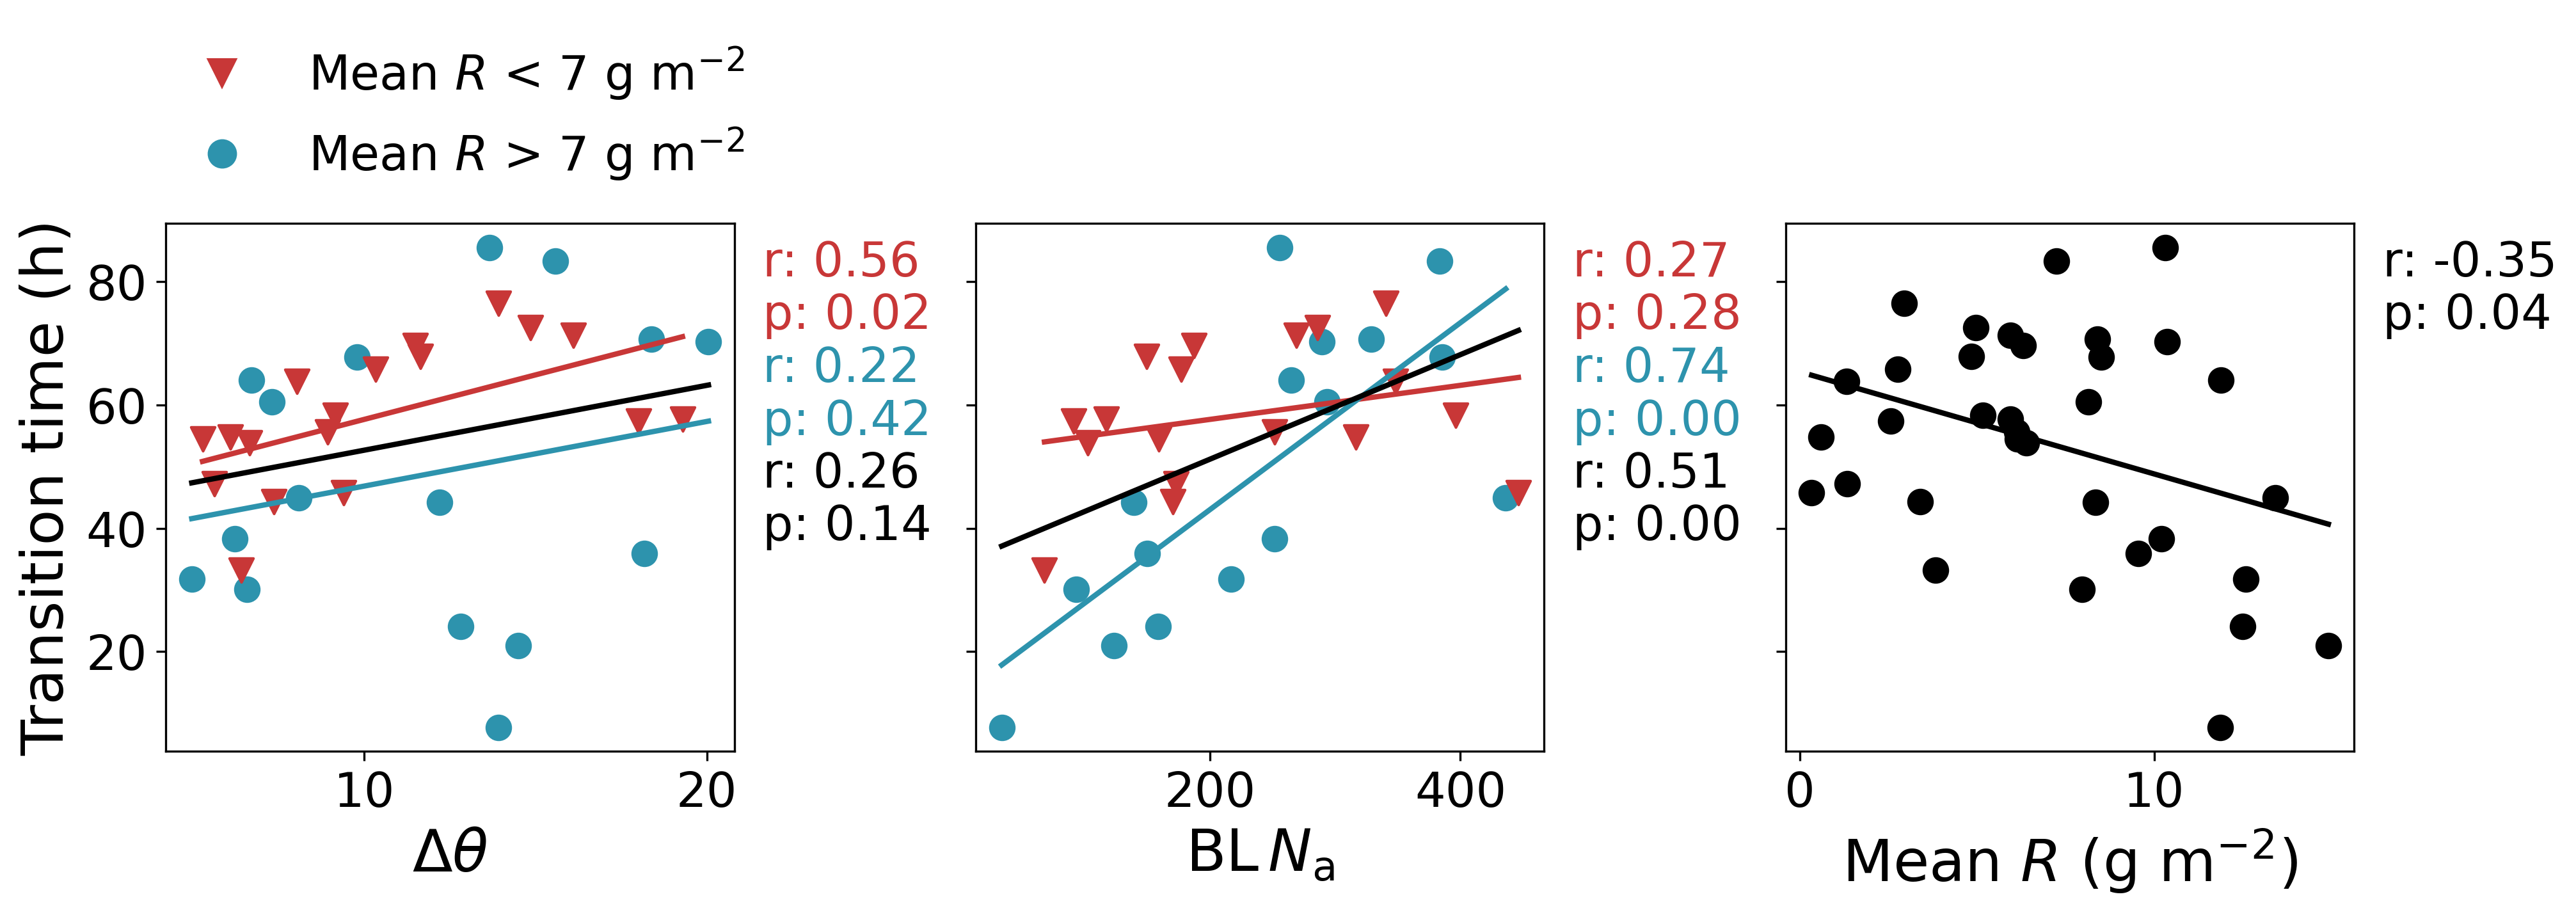

In [88]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

blue_colour = "#2d93adff"
red_colour = "#c83737ff"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey='row', dpi=300)    # just delta theta and na
#fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5), sharey='row', dpi=300)    # just delta theta and na
plt.subplots_adjust(top=0.75, bottom=0.2, wspace=0.425, left=0.1, right=0.86)

#titles = ['BL q$_{v}$', 'BL z', r'$\Delta$$\theta$', '$\Delta$q$_{v}$', 'BL N$_{a}$', '10$^{b_{aut}}$', 'vs transition time']
titles = [r'$\Delta\theta$','$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$']
for l, (title, i) in enumerate(zip(titles, [2,4])):
    axes[l].set_xlabel(title)

    axes[l].scatter(inputs[:,i][output_data["RWP mean"] > 7], output_data["Transition time"][output_data["RWP mean"] > 7], c=blue_colour, s=80, marker='o')
    axes[l].scatter(inputs[:,i][output_data["RWP mean"] < 7], output_data["Transition time"][output_data["RWP mean"] < 7], c=red_colour, s=80, marker='v')
    
    x_data = inputs[:,i][output_data["RWP mean"] < 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] < 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=red_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.9, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=red_colour)
    axes[l].text(1.05, 0.8, f'p: {pearson.pvalue:.2f}', transform= axes[l].transAxes, color=red_colour)

    x_data = inputs[:,i][output_data["RWP mean"] > 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] > 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=blue_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.7, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=blue_colour)
    axes[l].text(1.05, 0.6, f'p: {pearson.pvalue:.2f}', transform= axes[l].transAxes, color=blue_colour)

    x_data = inputs[:,i]
    y_data = output_data["Transition time"]
    
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)

    axes[l].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.5,f'r: {pearson.correlation:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67
    axes[l].text(1.05, 0.4,f'p: {pearson.pvalue:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67


x_data = output_data["RWP mean"]
y_data = output_data["Transition time"]
axes[-1].scatter(x_data, y_data, c='black', s=80)
r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
x_data_sorted = np.sort(x_data)
y_pred = [(m*x+b) for x in x_data_sorted]
corr = scipy.stats.pearsonr(x_data, y_data)  
axes[-1].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
axes[-1].text(1.05, 0.9,f'r: {corr.correlation:.2f}',transform=axes[-1].transAxes, fontsize=SMALL_SIZE)
axes[-1].text(1.05, 0.8,f'p: {corr.pvalue:.2f}',transform=axes[-1].transAxes, fontsize=SMALL_SIZE)

axes[-1].set_xlabel("Mean $\mathit{R}$ (g m$^{-2}$)")


axes[0].set_ylabel("Transition time (h)")

blues = mlines.Line2D([], [], color=blue_colour, marker='o', linestyle='None',
                          markersize=10)
reds = mlines.Line2D([], [], color=red_colour, marker='v', linestyle='None',
                          markersize=10)
fig.legend(handles=[reds, blues], 
             labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mathit{R}$ > 7 g m$^{-2}$"], 
             loc=(0.06,0.78), frameon=False)

fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval_mean_R.png", facecolor='white', dpi=300)
fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval_mean_R.pdf", facecolor='white', dpi=300)

### With ICE mean

<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:88: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:21: SyntaxWarning: invalid escape sequence '\m'
<>:88: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
<>:98: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_565/4002707337.py:21: SyntaxWarning: invalid escape sequence '\m'
  titles = [r'$\Delta\theta$','$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$']
/tmp/ipykernel_565/4002707337.py:88: SyntaxWarning: invalid escape sequence '\m'
  axes[-1].set_xlabel("Mean $\mathit{R}$ (g m$^{-2}$)")
/tmp/ipykernel_565/4002707337.py:98: SyntaxWarning: invalid escape sequence '\m'
  labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mathit{R}$ > 7 g m$^{-2}$"],
/tmp/ipykernel_565/4002707337.py:98: SyntaxWarning: invalid escape sequence '\m'
  labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mat

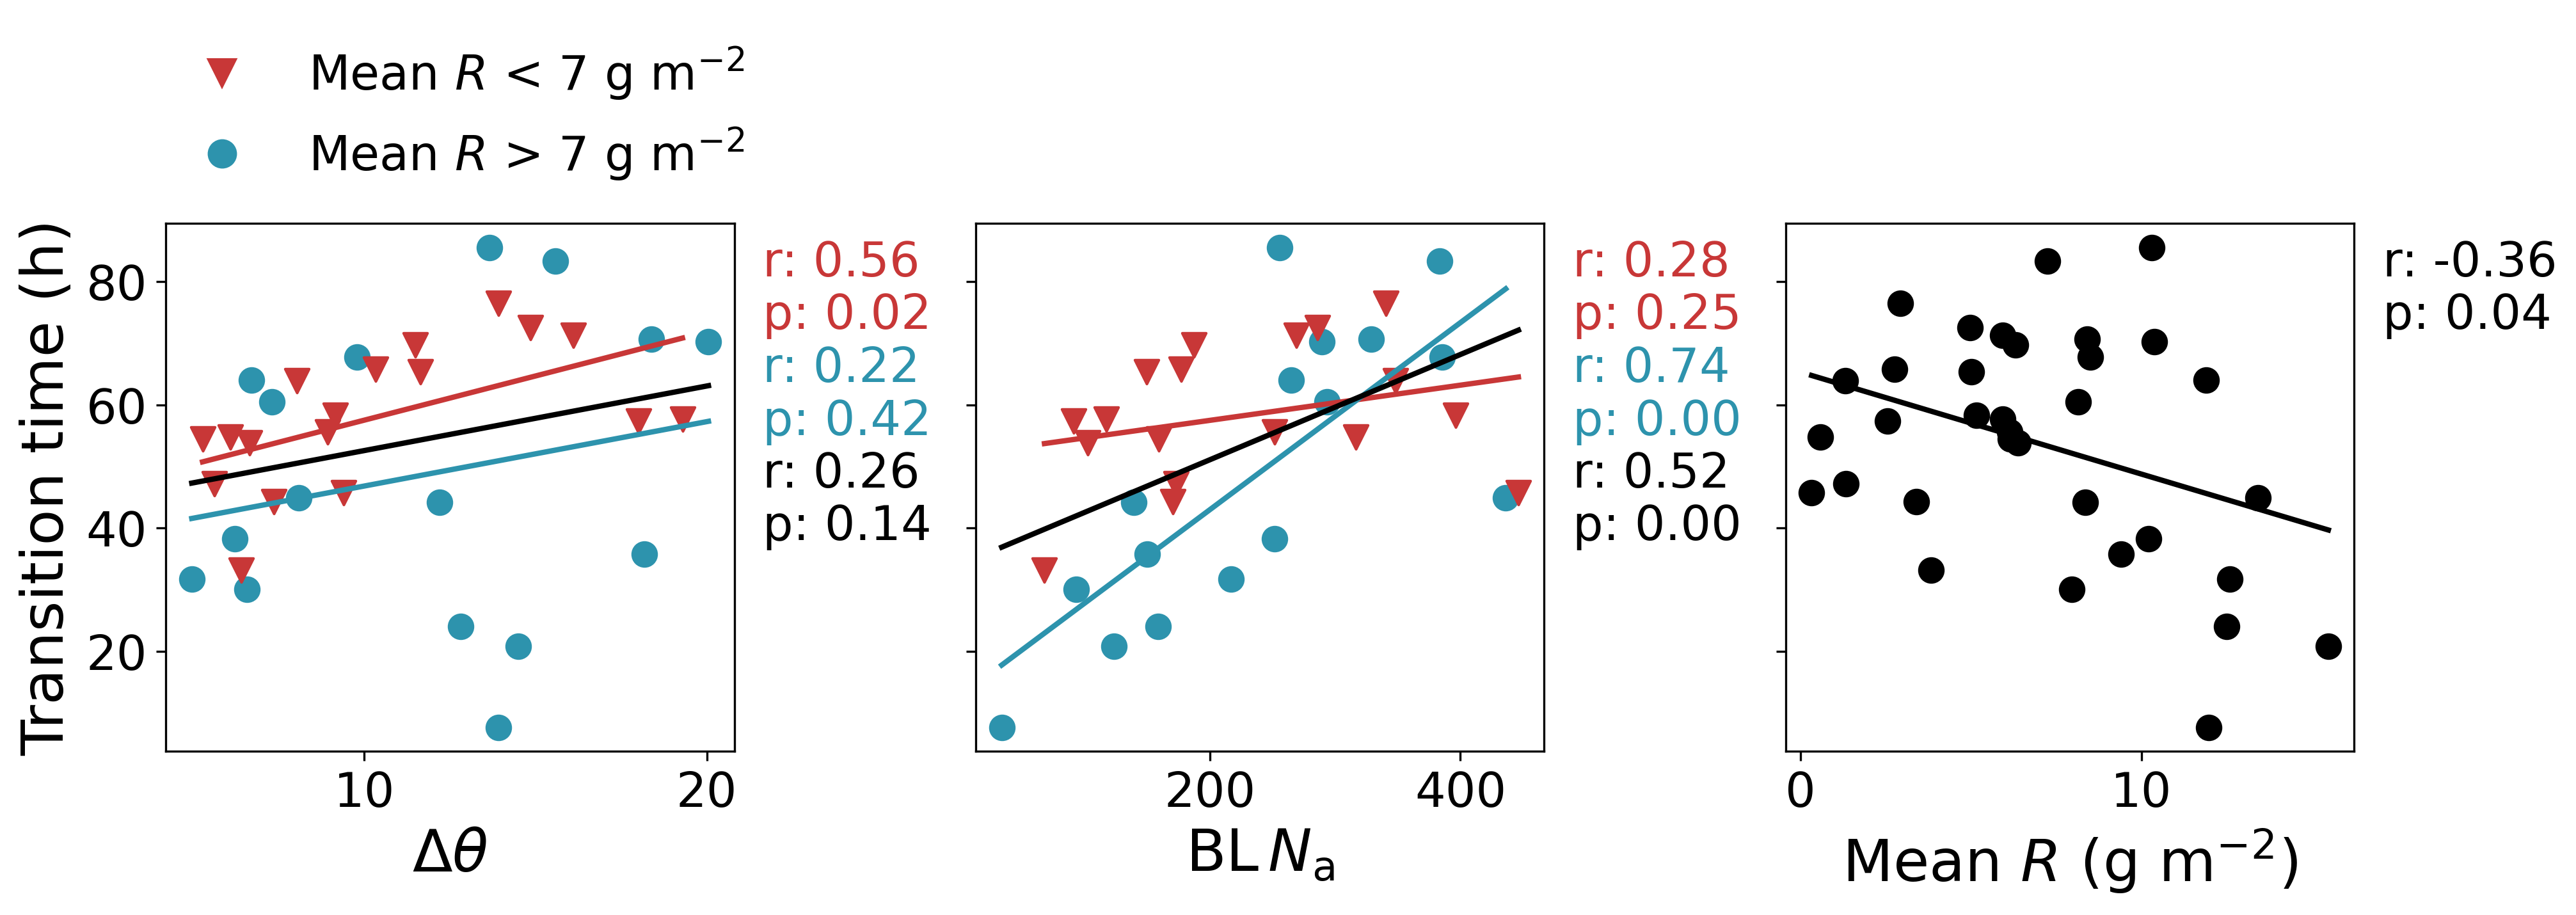

In [6]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

blue_colour = "#2d93adff"
red_colour = "#c83737ff"

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey='row', dpi=300)    # just delta theta and na
#fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(30,5), sharey='row', dpi=300)    # just delta theta and na
plt.subplots_adjust(top=0.75, bottom=0.2, wspace=0.425, left=0.1, right=0.86)

#titles = ['BL q$_{v}$', 'BL z', r'$\Delta$$\theta$', '$\Delta$q$_{v}$', 'BL N$_{a}$', '10$^{b_{aut}}$', 'vs transition time']
titles = [r'$\Delta\theta$','$\mathrm{BL}\,\mathit{N}_{\mathrm{a}}$']
for l, (title, i) in enumerate(zip(titles, [2,4])):
    axes[l].set_xlabel(title)

    axes[l].scatter(inputs[:,i][output_data["RWP mean"] > 7], output_data["Transition time"][output_data["RWP mean"] > 7], c=blue_colour, s=80, marker='o')
    axes[l].scatter(inputs[:,i][output_data["RWP mean"] < 7], output_data["Transition time"][output_data["RWP mean"] < 7], c=red_colour, s=80, marker='v')
    
    x_data = inputs[:,i][output_data["RWP mean"] < 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] < 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=red_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.9, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=red_colour)
    axes[l].text(1.05, 0.8, f'p: {pearson.pvalue:.2f}', transform= axes[l].transAxes, color=red_colour)

    x_data = inputs[:,i][output_data["RWP mean"] > 7]
    y_data = output_data["Transition time"][output_data["RWP mean"] > 7]
    
    if i == 5:
        x_data = np.asarray([10**x for x in x_data])

    #### attempt to plot blue and red correlations
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)
    
    axes[l].plot(x_data_sorted, y_pred, c=blue_colour, lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.7, f'r: {pearson.correlation:.2f}', transform= axes[l].transAxes, color=blue_colour)
    axes[l].text(1.05, 0.6, f'p: {pearson.pvalue:.2f}', transform= axes[l].transAxes, color=blue_colour)

    x_data = inputs[:,i]
    y_data = output_data["Transition time"]
    
    r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
    m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
    x_data_sorted = np.sort(x_data)
    y_pred = [(m*x+b) for x in x_data_sorted]
    pearson = scipy.stats.pearsonr(x_data, y_data)

    axes[l].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
    axes[l].text(1.05, 0.5,f'r: {pearson.correlation:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67
    axes[l].text(1.05, 0.4,f'p: {pearson.pvalue:.2f}',transform=axes[l].transAxes,fontsize=SMALL_SIZE) #0.67


x_data = output_data["RWP mean"]
y_data = output_data["Transition time"]
axes[-1].scatter(x_data, y_data, c='black', s=80)
r, y_mean, x_mean, y_std, x_std = calc_r(x_data, y_data)
m, b = calc_line(r, y_mean, x_mean, y_std, x_std)
x_data_sorted = np.sort(x_data)
y_pred = [(m*x+b) for x in x_data_sorted]
corr = scipy.stats.pearsonr(x_data, y_data)  
axes[-1].plot(x_data_sorted, y_pred, c='black', lw=2, label=f'r: {r:.2f}')
axes[-1].text(1.05, 0.9,f'r: {corr.correlation:.2f}',transform=axes[-1].transAxes, fontsize=SMALL_SIZE)
axes[-1].text(1.05, 0.8,f'p: {corr.pvalue:.2f}',transform=axes[-1].transAxes, fontsize=SMALL_SIZE)

axes[-1].set_xlabel("Mean $\mathit{R}$ (g m$^{-2}$)")


axes[0].set_ylabel("Transition time (h)")

blues = mlines.Line2D([], [], color=blue_colour, marker='o', linestyle='None',
                          markersize=10)
reds = mlines.Line2D([], [], color=red_colour, marker='v', linestyle='None',
                          markersize=10)
fig.legend(handles=[reds, blues], 
             labels=["Mean $\mathit{R}$ < 7 g m$^{-2}$", "Mean $\mathit{R}$ > 7 g m$^{-2}$"], 
             loc=(0.06,0.78), frameon=False)

# fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval_mean_R.png", facecolor='white', dpi=300)
# fig.savefig("figures/output_1d_rwp_split_sc_beginning_pval_mean_R.pdf", facecolor='white', dpi=300)